# Churn modeling classification 

Churn modeling is based opon data of employees of a bank where we try to find out whether an employee stands a chance to stay in the campany or not.

It has 10000 columns and 14 rows


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
from joblib import dump, load

In [3]:
# loading the dataset
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_28ecff17db844071a890c39b038af1ae = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='5zBRouvW3pBUwPqvRievPPgmxHSHg6KdLp7IDnIB9gs7',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_28ecff17db844071a890c39b038af1ae.get_object(Bucket='churndatamodel-donotdelete-pr-u2cmwnkgkywaoi',Key='Churn_Modelling.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

churn_data = pd.read_csv(body)
churn_data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
churn_data.shape

(10000, 14)

In [6]:
# getting more information from the data
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


From the data we can see that there are 10000 entries (rows) and 14 columns.
There is no null value in the dataset and there are different data types as well.
1. **RowNumber, CustomerId, Age, Tenure, NomOfProducts, HasCrCard, IsActiveMember, Exited** are all **int64**
2. **Surname, Geography, Gender** are **object dtypes**
3. **Balance, EstimatedSalary** are **float64 dtypes**


In [7]:
# getting the description
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# isna
churn_data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# getting all the unique items in each column
churn_data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

RowNumber and CustomerId are all unique

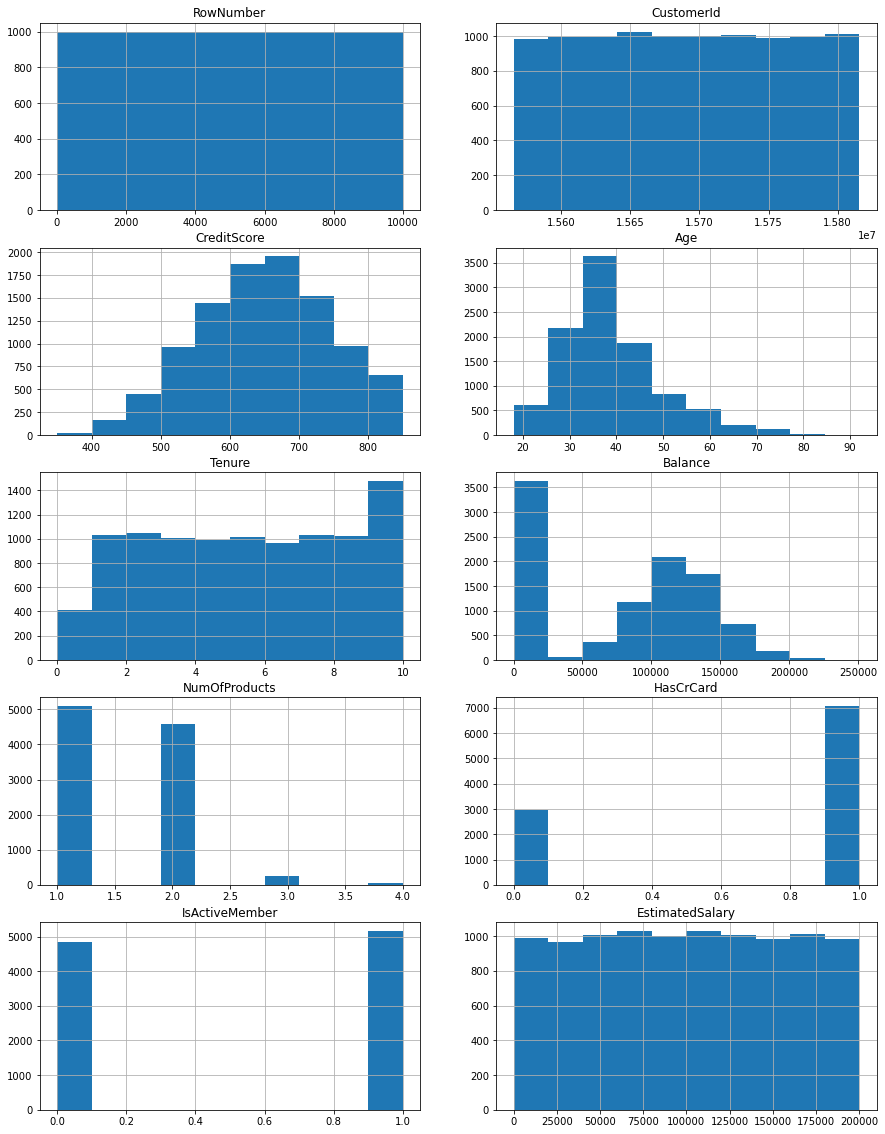

In [10]:
# plotting a histogram
plt.figure(figsize=(15, 20))

# list of numerical columns
num_cols = ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
for i, col in enumerate(num_cols):
  plt.subplot(5, 2, i+1)
  churn_data[col].hist()
  plt.title(col)

1. First we need to drop the **RowNumber** and **CustomerId** column because it has no use
2. Some of the columns are skewed and needs to be normalized

## Understanding more relationships from the data

In [11]:
# dropping the RowNumber column 
churn_data.drop(['RowNumber', 'CustomerId'], axis=1, inplace=True)
churn_data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# finding the total of those Exited 
churn_data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

**Those not Exited are 3 times more than those Exited**

In [13]:
# finding the total male and female
churn_data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
churn_data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [15]:
# counting the total number of each country in Geography column
churn_data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [16]:
# check whether there is a unique Surname
churn_data['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [17]:
churn_data['Surname'].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [18]:
churn_data.groupby(['Gender']).mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [19]:
# grouping Gender and Exited to find out the mean of the male and female who were Exited and those not
churn_data.groupby(['Gender', 'Exited']).mean()

CreditScore        Age    Tenure       Balance  NumOfProducts  \
Gender Exited                                                                  
Female 0        652.152468  37.382491  4.977086  71183.249639       1.555229   
       1        646.883231  44.784899  4.933275  89036.639359       1.510975   
Male   0        651.629743  37.427725  5.075236  73911.607037       1.536082   
       1        643.408686  44.905345  4.932071  93736.483742       1.429844   

               HasCrCard  IsActiveMember  EstimatedSalary  
Gender Exited                                              
Female 0        0.704172        0.549354     99816.071486  
       1        0.697981        0.363477    102948.986093  
Male   0        0.709366        0.558456     99680.391827  
       1        0.700445        0.357461     99584.287272

In [20]:
churn_data.groupby(['Geography']).mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [21]:
churn_data.groupby(['Geography', 'Exited']).mean()

CreditScore        Age    Tenure        Balance  \
Geography Exited                                                    
France    0        651.162226  37.235966  5.005471   60339.275678   
          1        641.914815  45.133333  5.000000   71192.795728   
Germany   0        653.261357  37.311504  5.011799  119427.106696   
          1        647.689189  44.894349  5.006143  120361.075590   
Spain     0        652.104167  37.839147  5.107558   59678.070470   
          1        647.484262  44.147700  4.656174   72513.352446   

                  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
Geography Exited                                                             
France    0            1.541389   0.707422        0.545433     99217.097331  
          1            1.476543   0.702469        0.367901    103439.278296  
Germany   0            1.551032   0.716224        0.561652    102414.657876  
          1            1.454545   0.708845        0.363636     98403.886450  
Spain     0            1.544574   0.699128        0.567345     98602.369864  
          1            1.513317   0.673123        0.341404    103629.554818

In [22]:
churn_data.groupby(['Surname']).median()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Surname,,,,,,,,,
Abazu,647.0,30.0,7.5,42767.415,1.0,0.5,0.0,108782.110,0.0
Abbie,818.0,31.0,1.0,186796.370,1.0,0.0,0.0,178252.630,0.0
Abbott,667.0,31.0,2.0,62336.230,1.5,1.0,0.5,74557.440,0.0
Abdullah,802.0,60.0,3.0,92887.060,1.0,1.0,0.0,39473.630,1.0
Abdulov,614.5,33.5,6.0,119347.785,1.5,1.0,1.0,147758.360,0.0
...,...,...,...,...,...,...,...,...,...
Zubarev,740.0,43.0,6.0,0.000,2.0,0.0,1.0,34948.770,0.0
Zubareva,592.0,42.0,1.0,147249.290,2.0,1.0,1.0,63023.020,0.0
Zuev,730.0,39.0,1.0,116537.600,1.0,0.0,0.0,145679.600,0.0


In [23]:
# we need to drop the Surname column as it is not that important as the distribution of unique names are too many
churn_data.drop('Surname', axis=1, inplace=True)
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Visualization

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Not Exited'), Text(1, 0, 'Exited')]

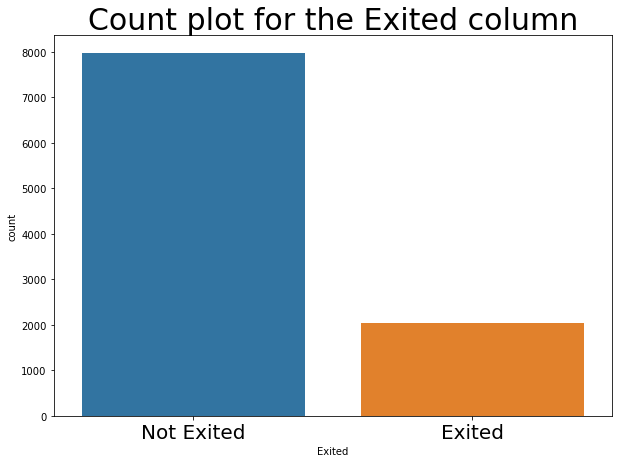

In [24]:
# visualizing the Exited column
plt.figure(figsize=(10, 7))
exited_viz = sns.countplot(churn_data.Exited)
exited_viz.set_title('Count plot for the Exited column', fontsize=30)
exited_viz.set_xticklabels(['Not Exited', 'Exited'], fontsize=20)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

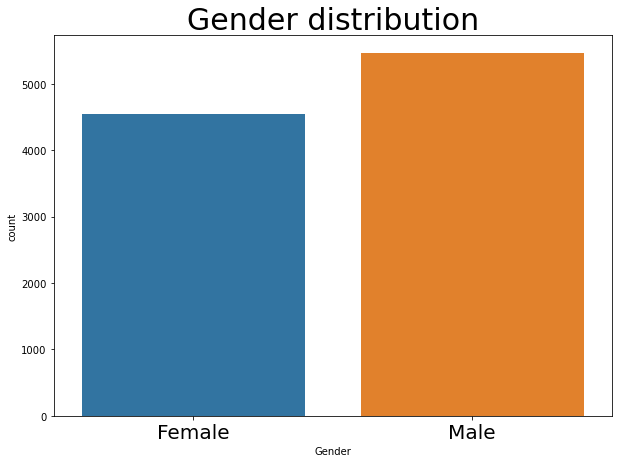

In [25]:
# visualizing the distibution of gender
plt.figure(figsize=(10, 7))
gender_viz = sns.countplot(churn_data.Gender)
gender_viz.set_title('Gender distribution', fontsize=30)
gender_viz.set_xticklabels(['Female', 'Male'], fontsize=20)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'France'), Text(1, 0, 'Germary'), Text(2, 0, 'Spain')]

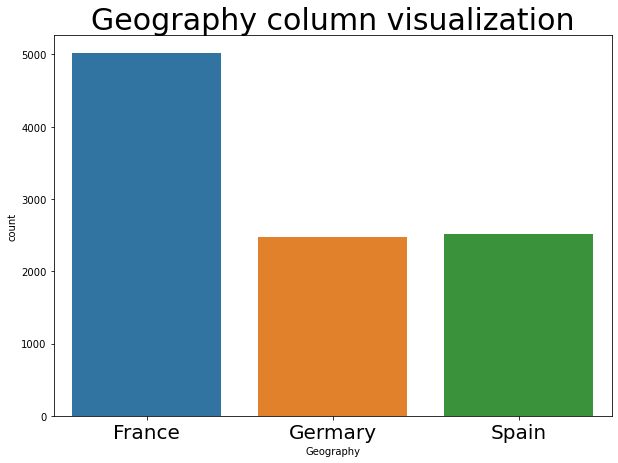

In [26]:
# visualizing the Geography column
plt.figure(figsize=(10,7))
geo_viz = sns.countplot(churn_data.Geography)
geo_viz.set_title('Geography column visualization', fontsize=30)
geo_viz.set_xticklabels(['France', 'Germary', 'Spain'], fontsize=20)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'NumOfProducts column visualization')

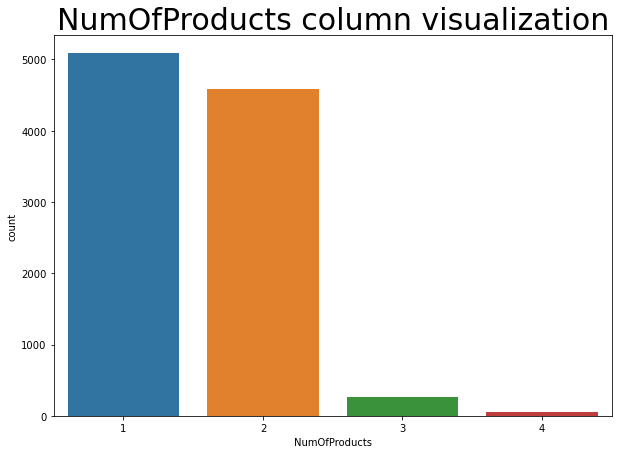

In [27]:
# NumOfProducts visualization
plt.figure(figsize=(10,7))
geo_viz = sns.countplot(churn_data.NumOfProducts)
geo_viz.set_title('NumOfProducts column visualization', fontsize=30)

## Data preprocessing

In [28]:
# splitting the data into Features and Labels
X = churn_data.drop('Exited', axis=1)
y = churn_data['Exited']

In [29]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [30]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [31]:
X.shape

(10000, 10)

In [32]:
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

* Using LabelEncoder to convert text data to numerical data

In [33]:
# before encoding
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [34]:
# coverting text data to numerical data
cat_col = ['Geography', 'Gender']

le = LabelEncoder()

for col in cat_col:
  X[col] = le.fit_transform(X[col])

In [35]:
# After encoding
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


* splitting into train and test set

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.shape, X_train.shape, X_test.shape

((10000, 10), (8000, 10), (2000, 10))

* Standardizing the data with StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
# computing the mean and standar deviation
scaler.fit(X_train)
# scaling the sets
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [39]:
X_train_std

array([[ 0.35649971, -0.9055496 ,  0.91324755, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-0.20389777,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.96147213,  1.50884694,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 0.86500853, -0.9055496 , -1.09499335, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 0.15932282, -0.9055496 ,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.47065475,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699, -0.81456811]])

## Modeling

* Create a baseline model 
* Create a model with RandomForestClassifier
* Creata a model with SVC
* Use randomizeSearchCV

1. model 1 - support vector classifier

In [40]:
# starting with a base line model
svc = SVC()

svc.fit(X_train_std, y_train)

# validating the model on the training set
svc.score(X_train_std, y_train)


0.862625

In [41]:
# finding out how the model is doing on the test set
svc.score(X_test_std, y_test)

0.8575

In [42]:
# making predictions
y_pred = svc.predict(X_test_std)
score = accuracy_score(y_test, y_pred)
score

0.8575

In [43]:
# classification report
cl_report = classification_report(y_test, y_pred)
print(cl_report)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.80      0.37      0.50       393

    accuracy                           0.86      2000
   macro avg       0.83      0.67      0.71      2000
weighted avg       0.85      0.86      0.84      2000



In [44]:
confusion_matrix(y_test, y_pred)

array([[1571,   36],
       [ 249,  144]])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


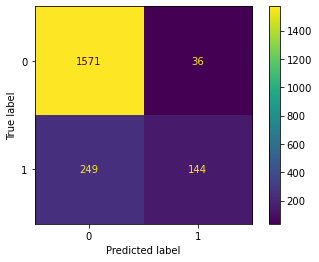

In [45]:
# ploting a confusion matrix
conf_mat = plot_confusion_matrix(svc, X_test_std, y_test);
conf_mat

2. Model_2 - random forest classifier

In [46]:
forest_clf = RandomForestClassifier()

forest_clf.fit(X_train_std, y_train)

# evaluating the model with the train set
forest_clf.score(X_train_std, y_train)

1.0

In [47]:
# making prediction
y_pred = forest_clf.predict(X_test_std)
score = accuracy_score(y_test, y_pred)
score

0.867

In [48]:
# classification report
cl_report = classification_report(y_test, y_pred)
print(cl_report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [49]:
confusion_matrix(y_test, y_pred)

array([[1548,   59],
       [ 207,  186]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


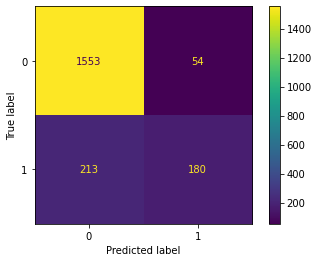

In [ ]:
# ploting confusion matrix
plot_confusion_matrix(forest_clf, X_test_std, y_test)

In [50]:
# using corss_val_score to train the model 5 times 
cross_val = cross_val_score(forest_clf, X, y, cv=5)
cross_val

array([0.8535, 0.866 , 0.8625, 0.8635, 0.854 ])

From the above estimaters used:
* SVC is performing **86%** on the training set and **85%** on the test set
* RandomForestClassifier is performing **100%** on the training set and **86%** on the test set

So RandomForest is performing better than the SVC.

Now we need to use the RandomizedSearchCV to try and tune so parameters for better performance

## Installing watson studio

In [51]:
!pip install ibm_watson_machine_learning

In [52]:
from ibm_watson_machine_learning import APIClient
url_credentials = {
    'url' : 'https://us-south.ml.cloud.ibm.com',
    'apikey' : 'jlREDh7QPP6ij5CldlMwSYycRwj1dExziNktepJ9dYLf'
}
client = APIClient(url_credentials)

In [55]:
def guld_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print space
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [57]:
space_uid = guld_from_space_name(client, 'models')
print('Space UID = ' + space_uid)

Space UID = e6b82a5b-a7ce-4f43-aa53-b36bbcfac42d


In [59]:
client.set.default_space(space_uid)

'SUCCESS'

In [61]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a17-24d8-5082-900f-0ab31fbfd3cb  base
scikit-learn_0.22-py3.6        154010f

In [83]:
software_spec_uid = client.software_specifications.get_uid_by_name('default_py3.8')
software_spec_uid

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [84]:
model_details = client.repository.store_model(model=forest_clf, meta_props={
    client.repository.ModelMetaNames.NAME : 'Churn_modeling',
    client.repository.ModelMetaNames.TYPE : 'scikit-learn_0.23',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid
})

model_id = client.repository.get_model_id(model_details)

Note: Warnings!! :  Software specification default_py3.8 specified for the wml_model is deprecated and will be removed in the future. We recommend you use runtime-22.1-py3.9 instead. For details see Supported Frameworks https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [85]:
model_id

'3a51de18-18d2-48e2-bcf9-164ddbcdef14'

In [86]:
X_train_std[0]

array([ 0.35649971, -0.9055496 ,  0.91324755, -0.6557859 ,  0.34567966,
       -1.21847056,  0.80843615,  0.64920267,  0.97481699,  1.36766974])